#Importing Libraries

In [6]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
sns.set()
import datetime as dt
pd.set_option('display.max_columns', 500)
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.stats as stats
from sklearn.feature_selection import RFE 
import plotly.express as px 
from IPython.display import Image   
from sklearn.tree import export_graphviz
from six import StringIO

#Reading and Understanding the Data

In [7]:
path = '/content/drive/MyDrive/CSV.file/fraudTest.csv'
df1 = pd.read_csv(path)
df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [8]:
path = '/content/drive/MyDrive/CSV.file/fraudTrain.csv'
df2 = pd.read_csv(path)
df2.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
df1.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
df2.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
df1 = df1.drop(df1.columns[0], axis=1)

In [12]:
df2 = df2.drop(df2.columns[0], axis=1)

In [13]:
df1.shape

(555719, 22)

In [14]:
df2.shape

(1296675, 22)

In [15]:
df = pd.concat([df1,df2])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [16]:
df.shape

(1852394, 22)

In [17]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [19]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


#Data Cleaning

In [20]:
# Null values
round(100*(df.isnull().sum())/len(df), 2)

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

In [21]:
frd=df['is_fraud'].value_counts()
frd

0    1842743
1       9651
Name: is_fraud, dtype: int64

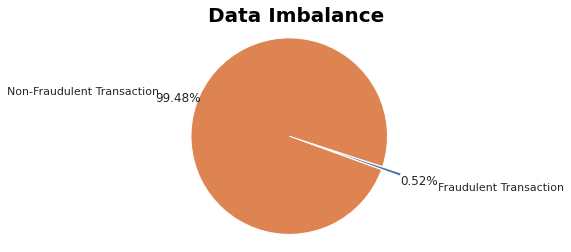

In [22]:
fraud= frd[1]/df['is_fraud'].count()*100
nfraud= frd[0]/df['is_fraud'].count()*100

label = ['Fraudulent Transaction','Non-Fraudulent Transaction']
values = [fraud, nfraud]
explode = (0.2, 0)
fig1, ax1 = plt.subplots()
ax1.pie(values,labels=label, explode=explode,autopct='%0.2f%%',shadow=False, startangle=340, pctdistance=1.2,labeldistance=1.4)
ax1.axis('equal') 
plt.title('Data Imbalance',fontsize=20, color='black', fontweight='bold')
plt.show()

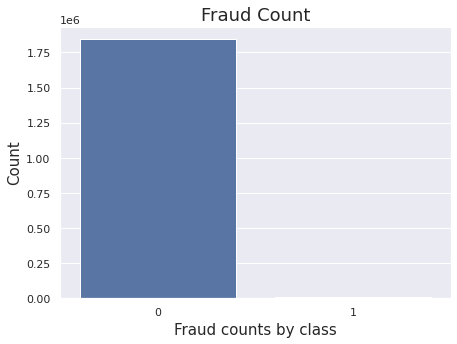

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(df['is_fraud'])
plt.title("Fraud Count", fontsize=18)
plt.xlabel("Fraud counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [24]:
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

,is_fraud,count,percentage
0,0,1842743,99.478999
1,1,9651,0.521001


In [25]:
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [26]:
# transform the data as per the convenience 
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date']=pd.to_datetime(df['trans_date'])
df['dob']=pd.to_datetime(df['dob'])
df['trans_day'] = df['trans_date_trans_time'].dt.day_name()
df['trans_month'] = df['trans_date_trans_time'].dt.month_name()
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_day,trans_month
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,Sunday,June
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,Sunday,June
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,Sunday,June
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,Sunday,June
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,Sunday,June


In [27]:
# checking Customer Age 
df['cust_age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))
df['cust_age']

0          52.0
1          30.0
2          50.0
3          33.0
4          65.0
           ... 
1296670    59.0
1296671    41.0
1296672    53.0
1296673    40.0
1296674    25.0
Name: cust_age, Length: 1852394, dtype: float64

In [28]:
# Binning Cstomer age group for better understanding regarding transaction as per the age crietria. 

df['cust_age_group'] = pd.cut(df['cust_age'], 
                         bins=[10,20,30,40,50,60,1000], 
                         labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60 - Above'])
df['cust_age_group'].value_counts(ascending=False)

40-50         431809
30-40         415647
60 - Above    383688
20-30         302436
50-60         263934
10-20          54880
Name: cust_age_group, dtype: int64

In [29]:
# Male VS Female ratio 

df.gender.value_counts()

F    1014749
M     837645
Name: gender, dtype: int64

In [30]:
# Setting Numerial columns 
numerical_col = df.select_dtypes(exclude=['object','datetime64[ns]','category'])
numerical_col.head()


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,cust_age
0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,52.0
1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,30.0
2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,50.0
3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,33.0
4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,65.0


In [31]:
cred_numer_col = df [["amt","zip","lat","long","city_pop","unix_time","merch_lat","merch_long","is_fraud"]]
cred_numer_col.head()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0


In [32]:
# Setting Categorical columns 
categorical_col = df.select_dtypes(exclude=['int64','datetime64[ns]','float'])
categorical_col.head()


,merchant,category,first,last,gender,street,city,state,job,trans_num,trans_day,trans_month,cust_age_group
0,fraud_Kirlin and Sons,personal_care,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,Sunday,June,50-60
1,fraud_Sporer-Keebler,personal_care,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,Sunday,June,20-30
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,Sunday,June,40-50
3,fraud_Haley Group,misc_pos,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,Set designer,2159175b9efe66dc301f149d3d5abf8c,Sunday,June,30-40
4,fraud_Johnston-Casper,travel,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,Furniture designer,57ff021bd3f328f8738bb535c302a31b,Sunday,June,60 - Above


#EDA: Univariate/Bivariate Analysis

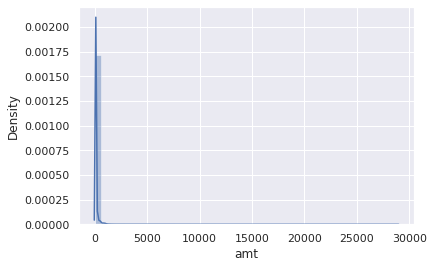

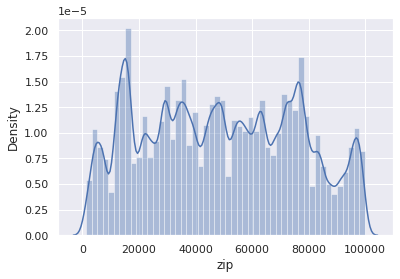

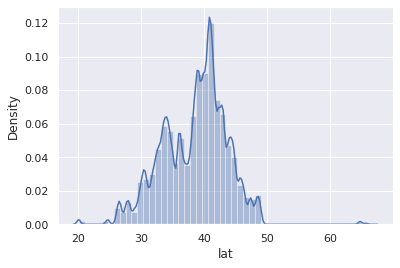

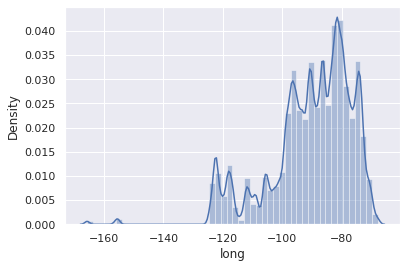

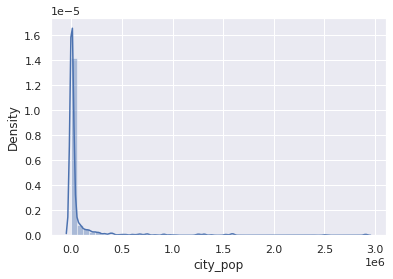

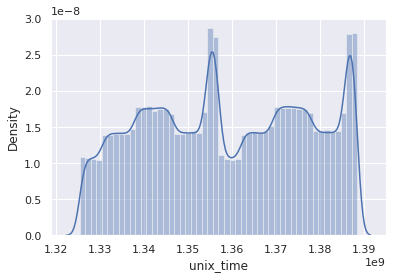

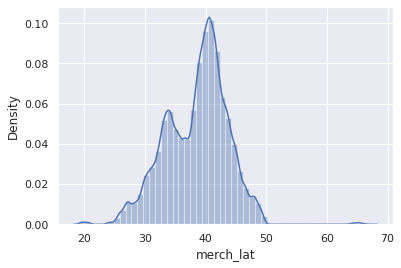

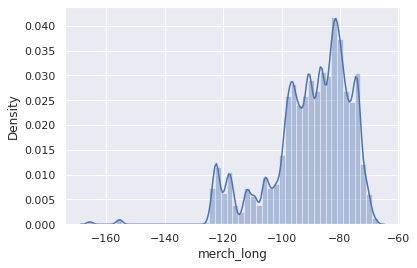

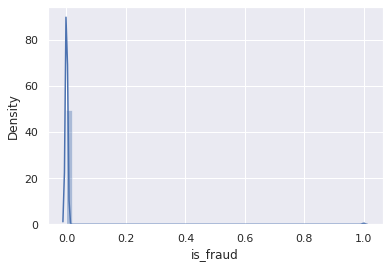

In [33]:
for c in cred_numer_col:
    sns.set_style(style=None, rc=None)
    sns.distplot(df[c])
    plt.show();


In [34]:
cred_fraud_plot = df[["category","gender","is_fraud"]]
cred_fraud_plot.head()


,category,gender,is_fraud
0,personal_care,M,0
1,personal_care,F,0
2,health_fitness,F,0
3,misc_pos,M,0
4,travel,M,0


In [35]:
cred_fraud_plot_2 = df[["state","job","city","merchant"]]
cred_fraud_plot_2.head()

,state,job,city,merchant
0,SC,Mechanical engineer,Columbia,fraud_Kirlin and Sons
1,UT,"Sales professional, IT",Altonah,fraud_Sporer-Keebler
2,NY,"Librarian, public",Bellmore,"fraud_Swaniawski, Nitzsche and Welch"
3,FL,Set designer,Titusville,fraud_Haley Group
4,MI,Furniture designer,Falmouth,fraud_Johnston-Casper


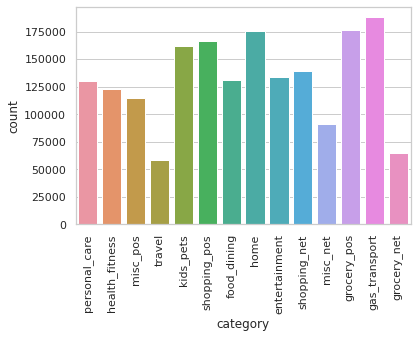

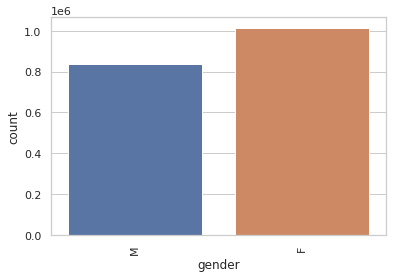

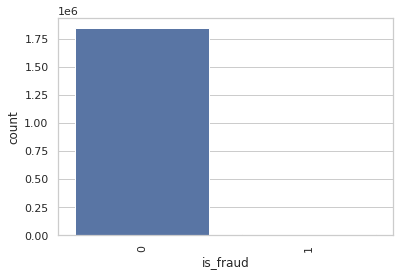

In [36]:
for c in cred_fraud_plot:
    sns.set_style("whitegrid")
    sns.countplot(df[c])
    plt.xticks(rotation = 90)
    plt.show();

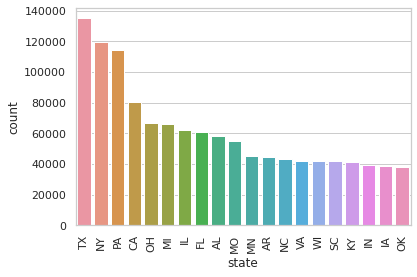

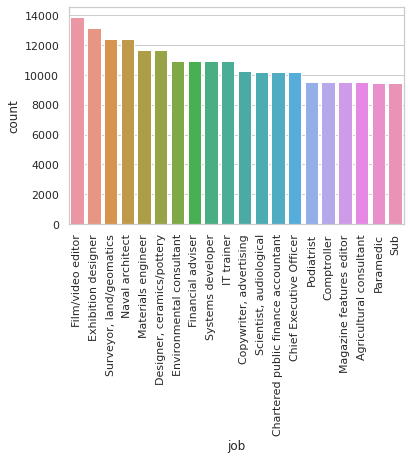

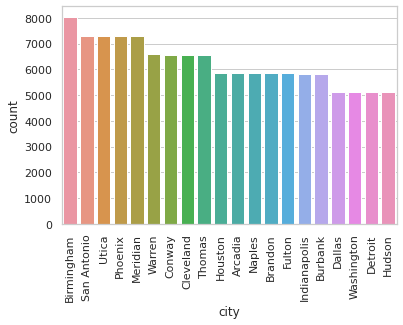

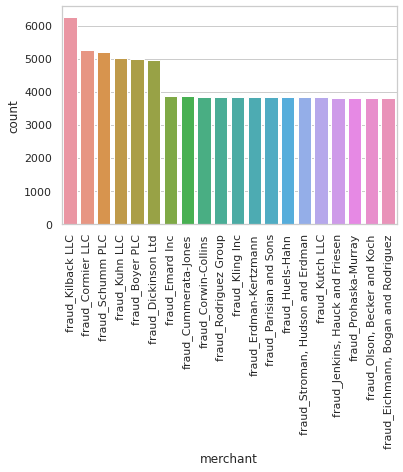

In [37]:
for c in cred_fraud_plot_2:
    sns.set_style("whitegrid")
    sns.countplot((df[c]), order=df[c].value_counts().iloc[:20].index)
    plt.xticks(rotation = 90)
    plt.show();

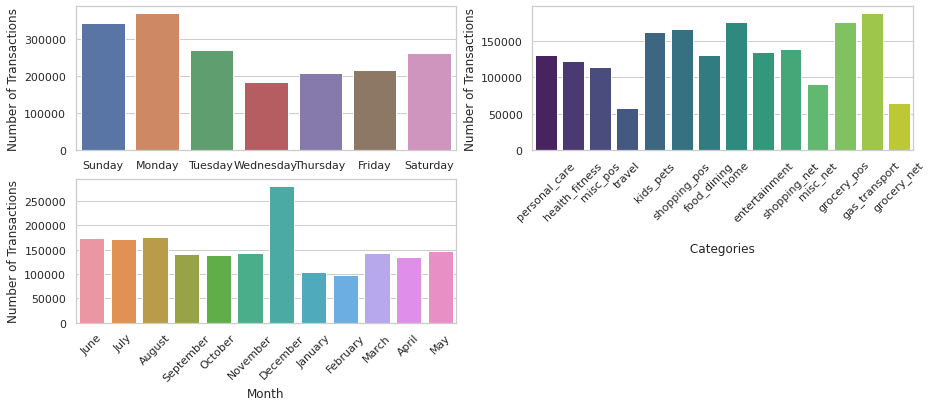

In [38]:
#distribution of transactions made on days of week

plt.figure(figsize=(15,9))
plt.subplot(3,2,1)
sns.countplot(df["trans_day"])
plt.xlabel("\n Days of week \n")
plt.ylabel("Number of Transactions")

plt.subplot(3,2,2)
sns.countplot(df["category"],palette="viridis")
plt.xlabel("\n Categories \n")
plt.ylabel("Number of Transactions")
plt.xticks(rotation = 45)

plt.subplot(3,2,3)
sns.countplot(df["trans_month"])
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation = 45)

plt.show()


In [39]:
#creating new dataframe to analysi=e data based on category
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

#df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category = df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category.head()

,index,Category,category_count,percent
0,2,gas_transport,188029,10.150594
1,4,grocery_pos,176191,9.511529
2,6,home,175460,9.472067
3,12,shopping_pos,166463,8.986371
4,7,kids_pets,161727,8.730702


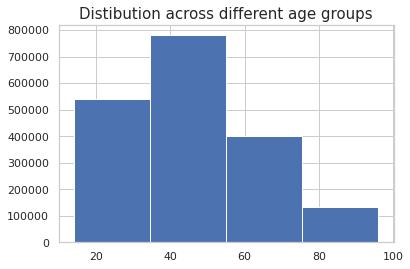

In [40]:
#distribution of fraud among different age groups

plt.hist(df.cust_age, bins = 4)
plt.title("Distibution across different age groups", fontdict = {"fontsize" : 15})
plt.show()

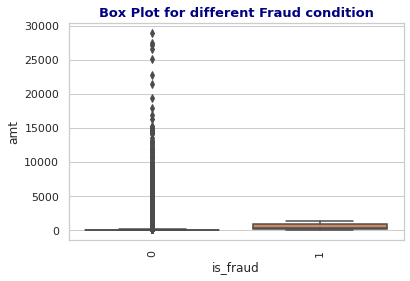

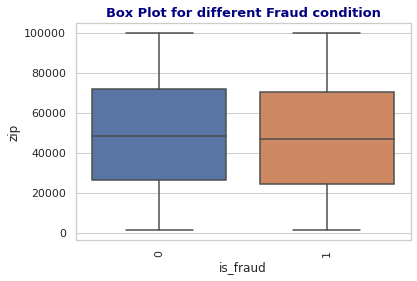

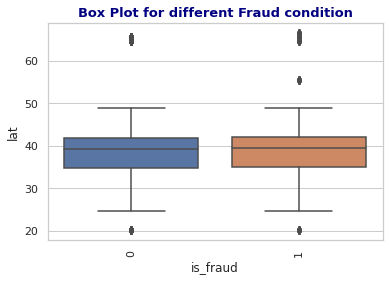

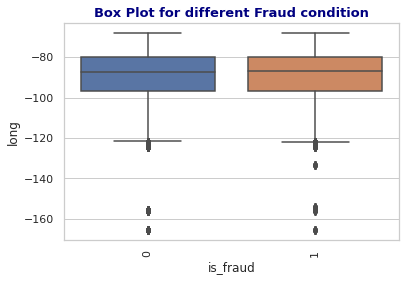

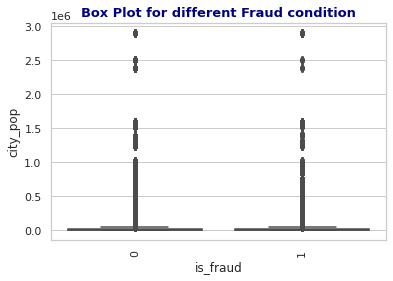

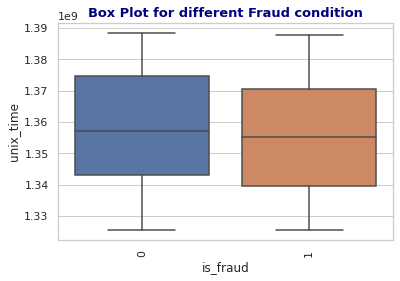

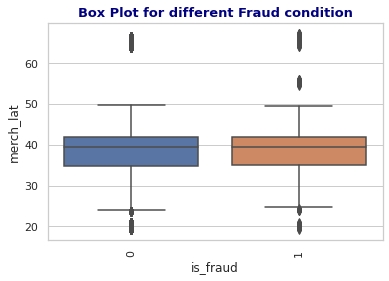

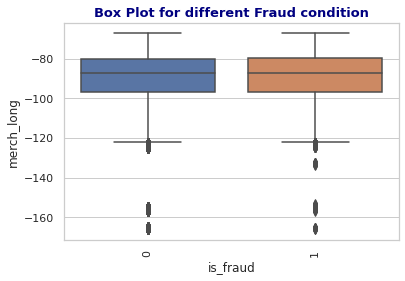

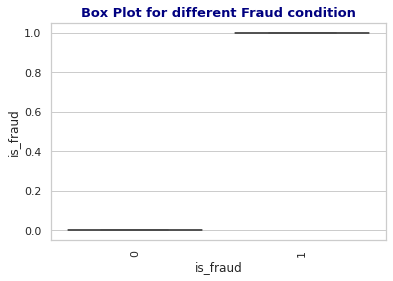

In [41]:
for c in cred_numer_col:
    sns.set_style("whitegrid")
    sns.boxplot(y = df[c], x = "is_fraud", data = cred_numer_col)
    plt.title("Box Plot for different Fraud condition",fontdict={'size':13, 'color':'navy', 'fontweight':'bold'})
    plt.xticks(rotation = 90)
    plt.show();

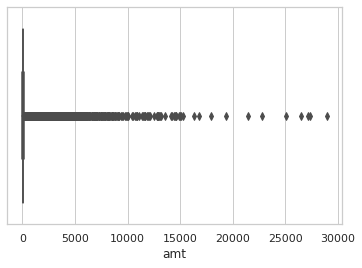

In [42]:
ax = sns.boxplot(x=df["amt"])
plt.show();


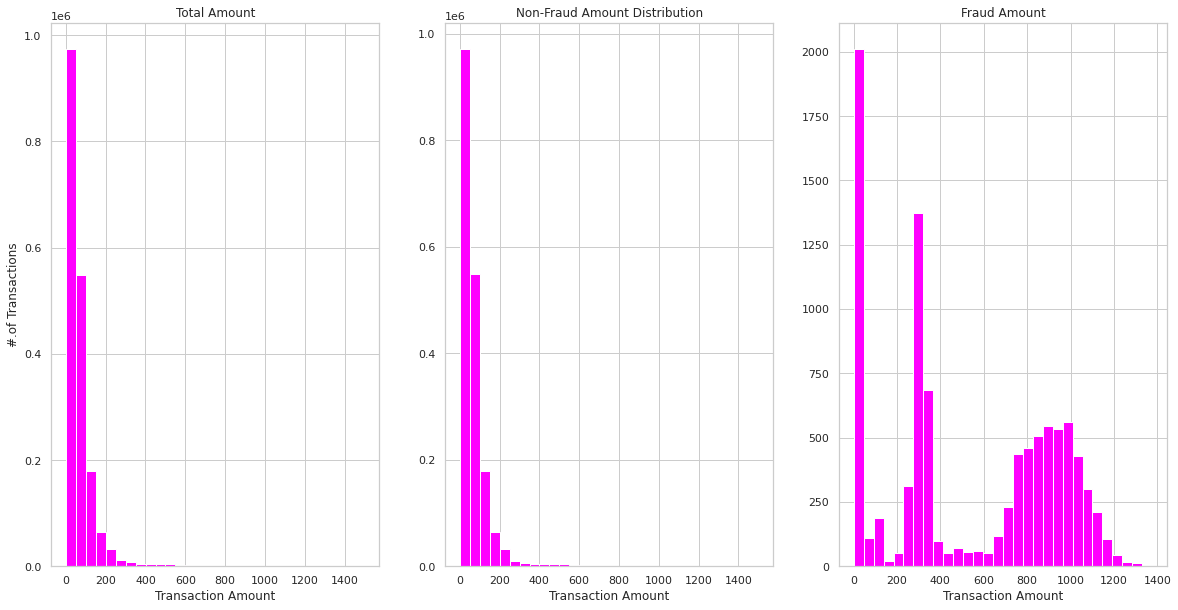

In [43]:
#distribution of transactions amount by different fraudulent  and non-fraudulent categories

fig, ax = plt.subplots(1,3,figsize=(20,10))
ax[0].hist(df[df['amt']<=1500]['amt'], bins=30,color='magenta')
ax[0].set_title('Total Amount')
ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'], bins=30,color='magenta')
ax[1].set_title('Non-Fraud Amount Distribution')
ax[1].set_xlabel('Transaction Amount')

ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=30,color='magenta')
ax[2].set_title('Fraud Amount')
ax[2].set_xlabel('Transaction Amount')

plt.show()

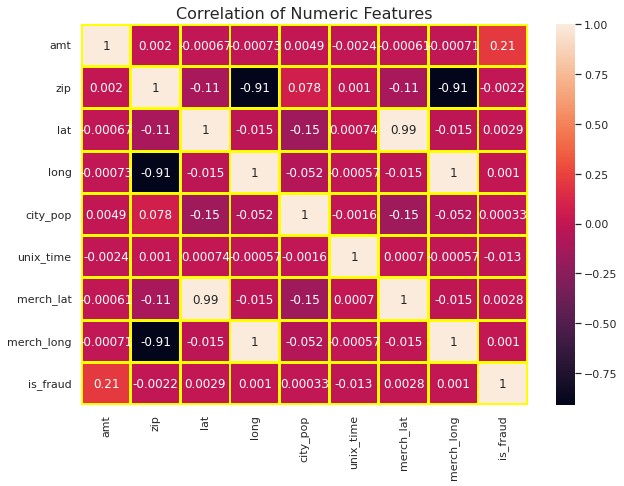

In [44]:
f , ax = plt.subplots(figsize = (10,7))
plt.title('Correlation of Numeric Features',y=1,size=16)
sns.heatmap(cred_numer_col.corr(),linewidths=2, linecolor='yellow', vmax =1,annot= True)
plt.show()

#Creating Dummy Variables

In [45]:
credit_category = df [["category","gender","cust_age_group","trans_day"]]
credit_dummy=pd.get_dummies(credit_category,drop_first=True)
credit_dummy.head()

,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,cust_age_group_20-30,cust_age_group_30-40,cust_age_group_40-50,cust_age_group_50-60,cust_age_group_60 - Above,trans_day_Monday,trans_day_Saturday,trans_day_Sunday,trans_day_Thursday,trans_day_Tuesday,trans_day_Wednesday
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0


In [46]:
credit_dummy = pd.concat([df,credit_dummy],axis=1)
credit_dummy.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_day,trans_month,cust_age,cust_age_group,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,cust_age_group_20-30,cust_age_group_30-40,cust_age_group_40-50,cust_age_group_50-60,cust_age_group_60 - Above,trans_day_Monday,trans_day_Saturday,trans_day_Sunday,trans_day_Thursday,trans_day_Tuesday,trans_day_Wednesday
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,Sunday,June,52.0,50-60,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,Sunday,June,30.0,20-30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,Sunday,June,50.0,40-50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,Sunday,June,33.0,30-40,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,Sunday,June,65.0,60 - Above,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0


In [47]:
credit_dummy['trans_hour'] = credit_dummy['trans_date_trans_time'].dt.hour
credit_dummy['trans_date'] = credit_dummy['trans_date_trans_time'].dt.date
credit_dummy.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_day,trans_month,cust_age,cust_age_group,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,cust_age_group_20-30,cust_age_group_30-40,cust_age_group_40-50,cust_age_group_50-60,cust_age_group_60 - Above,trans_day_Monday,trans_day_Saturday,trans_day_Sunday,trans_day_Thursday,trans_day_Tuesday,trans_day_Wednesday,trans_hour
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,Sunday,June,52.0,50-60,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,12
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,Sunday,June,30.0,20-30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,12
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,Sunday,June,50.0,40-50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,12
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,Sunday,June,33.0,30-40,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,12
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,Sunday,June,65.0,60 - Above,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,12


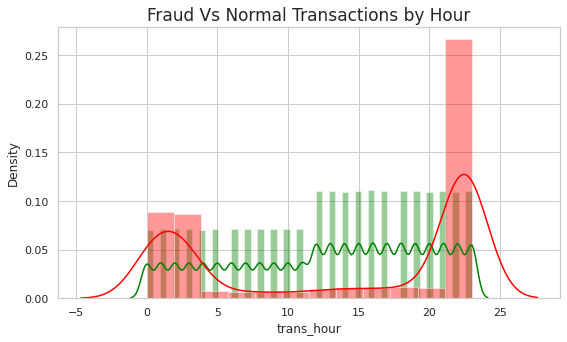

In [48]:
plt.figure(figsize=(9,5))
sns.distplot(credit_dummy[credit_dummy['is_fraud'] == 0]["trans_hour"], color='green')
sns.distplot(credit_dummy[credit_dummy['is_fraud'] == 1]["trans_hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

In [49]:
#Since the data is highly imbalanced we need to oversample the data.
nfraud_count = credit_dummy[credit_dummy['is_fraud'] == 0]['amt'].count()
fraud_a = credit_dummy[credit_dummy['is_fraud'] == 1]
nonfraud_a = credit_dummy[credit_dummy['is_fraud'] == 0]

In [50]:
#OverSampling
oversampled_frd = fraud_a.sample(nfraud_count, replace=True)
oversampled = pd.concat([nonfraud_a, oversampled_frd], axis=0)
oversampled['is_fraud'].value_counts()

0    1842743
1    1842743
Name: is_fraud, dtype: int64

In [51]:
oversampled.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_day,trans_month,cust_age,cust_age_group,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,cust_age_group_20-30,cust_age_group_30-40,cust_age_group_40-50,cust_age_group_50-60,cust_age_group_60 - Above,trans_day_Monday,trans_day_Saturday,trans_day_Sunday,trans_day_Thursday,trans_day_Tuesday,trans_day_Wednesday,trans_hour
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,Sunday,June,52.0,50-60,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,12
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,Sunday,June,30.0,20-30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,12
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,Sunday,June,50.0,40-50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,12
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,Sunday,June,33.0,30-40,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,12
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,Sunday,June,65.0,60 - Above,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,12


In [52]:
credit_dummy.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'trans_day', 'trans_month',
       'cust_age', 'cust_age_group', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M',
       'cust_age_group_20-30', 'cust_age_group_30-40', 'cust_age_group_40-50',
       'cust_age_group_50-60', 'cust_age_group_60 - Above', 'trans_day_Monday',
       'trans_day_Saturday', 'trans_day_Sunday', 'trans_day_Thursday',
       'trans_day_Tuesday', 'trans_day_Wednesday', 'trans_hour'],
      dtype='obj

In [53]:
credit_dummy.shape

(1852394, 53)

In [54]:
X = ['amt','city_pop', 'trans_hour','cust_age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','cust_age_group_20-30', 'cust_age_group_30-40', 'cust_age_group_40-50',
       'cust_age_group_50-60', 'cust_age_group_60 - Above', 'trans_day_Monday',
       'trans_day_Saturday', 'trans_day_Sunday', 'trans_day_Thursday',
       'trans_day_Tuesday', 'trans_day_Wednesday', 'trans_hour']

y = ['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(oversampled[X],oversampled[y] , 
                                                    train_size=0.7, test_size=0.3, random_state=100)

In [55]:
print("The shape of X_Train:",X_train.shape)
print("The shape of X_Train:",X_test.shape)

The shape of X_Train: (2579840, 30)
The shape of X_Train: (1105646, 30)


In [56]:
df2_fraud = credit_dummy[credit_dummy['is_fraud'] == 1]

fig = px.scatter_mapbox(df2_fraud, lat="lat", lon="long", hover_name="city",
                         zoom=3, height=500,
                         color="is_fraud",  color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [57]:
credit_dummy['category'].astype("category").value_counts()

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

In [58]:
X_train.head()

,amt,city_pop,trans_hour,cust_age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,cust_age_group_20-30,cust_age_group_30-40,cust_age_group_40-50,cust_age_group_50-60,cust_age_group_60 - Above,trans_day_Monday,trans_day_Saturday,trans_day_Sunday,trans_day_Thursday,trans_day_Tuesday,trans_day_Wednesday,trans_hour
45827,7.59,30770,4,26.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,4
450958,1032.04,2870,13,22.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,13
467707,26.35,568,12,50.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,12
921528,19.70,4870,22,63.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,22
267605,11.23,376,11,82.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,11


In [59]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [60]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [61]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[1192673   97069]
 [ 322880  967218]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85   1289742
           1       0.91      0.75      0.82   1290098

    accuracy                           0.84   2579840
   macro avg       0.85      0.84      0.84   2579840
weighted avg       0.85      0.84      0.84   2579840



In [62]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[511330  41671]
 [138626 414019]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85    553001
           1       0.91      0.75      0.82    552645

    accuracy                           0.84   1105646
   macro avg       0.85      0.84      0.84   1105646
weighted avg       0.85      0.84      0.84   1105646



In [63]:
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [64]:
print("Train Results")
pred_train = dt_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results
[[1282628    7114]
 [      0 1290098]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1289742
           1       0.99      1.00      1.00   1290098

    accuracy                           1.00   2579840
   macro avg       1.00      1.00      1.00   2579840
weighted avg       1.00      1.00      1.00   2579840



In [65]:
print("Test Results")
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results
[[549681   3320]
 [     0 552645]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553001
           1       0.99      1.00      1.00    552645

    accuracy                           1.00   1105646
   macro avg       1.00      1.00      1.00   1105646
weighted avg       1.00      1.00      1.00   1105646



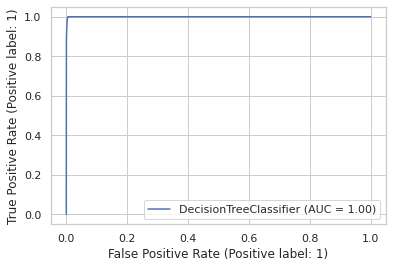

In [66]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt_clf, X_train, y_train, drop_intermediate=False)
plt.show()

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=345)

param_grid = { 
    'n_estimators': [50],
    'max_depth' : [8,16,20]
}

In [68]:
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.3min finished


RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345,
                       verbose=1)

In [69]:
RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345,verbose=1)

RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345,
                       verbose=1)

##Model Evaluation

In [70]:
print("Train Results")
pred_train = rf_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.0s finished


[[1287366    2376]
 [      0 1290098]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289742
           1       1.00      1.00      1.00   1290098

    accuracy                           1.00   2579840
   macro avg       1.00      1.00      1.00   2579840
weighted avg       1.00      1.00      1.00   2579840



In [71]:
#predicting on test set
print("Test Results")
pred_test = rf_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.0s finished


[[551636   1365]
 [     0 552645]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553001
           1       1.00      1.00      1.00    552645

    accuracy                           1.00   1105646
   macro avg       1.00      1.00      1.00   1105646
weighted avg       1.00      1.00      1.00   1105646



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.1s finished


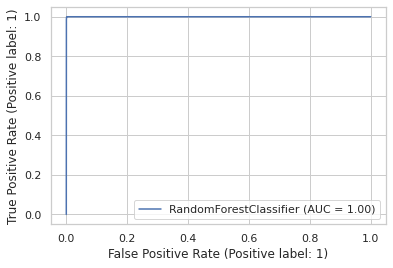

In [72]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_clf, X_train, y_train)
plt.show()

#Cost Benefit Analysis

In [73]:
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non Fraud Amt Distribution,Fraud Amt Distribution
0,count,1.852394e+06,1.842743e+06,9651.000000
1,mean,7.006357e+01,6.765128e+01,530.661412
2,std,1.592540e+02,1.535481e+02,391.028873
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.745000e+01,4.724000e+01,390.000000
5,95%,1.953400e+02,1.895900e+02,1084.090000
6,99.9%,1.517241e+03,1.519623e+03,1293.127000
7,max,2.894890e+04,2.894890e+04,1376.040000


In [74]:
#monthly num_of_transactions

amon_num_trans = df.groupby(df['trans_month'])[['trans_num','cc_num']].nunique().reset_index()
amon_num_trans.columns = ['Month','no_of_transactions','customers']
amon_num_trans

,Month,no_of_transactions,customers
0,April,134970,919
1,August,176118,911
2,December,280598,918
3,February,97657,919
4,January,104727,916
5,July,172444,913
6,June,173869,911
7,March,143789,920
8,May,146875,917
9,November,143056,912


In [75]:
#Average Number of transactions per  month 

amon_num_trans['no_of_transactions'].mean()/2

77183.08333333333

In [76]:
#Monthly num_of_fraud_transactions

fraud_trans_data = df[df['is_fraud']==1]
mon_num_trans = fraud_trans_data.groupby(fraud_trans_data['trans_month'])[['trans_num','cc_num']].nunique().reset_index()
mon_num_trans.columns = ['month','no_of_fraud_transactions','fraud_customers']
mon_num_trans

,month,no_of_fraud_transactions,fraud_customers
0,April,678,77
1,August,797,80
2,December,850,88
3,February,853,88
4,January,849,90
5,July,652,71
6,June,821,82
7,March,938,94
8,May,935,96
9,November,682,72


In [77]:
#Monthly num_of_fraud_transactions 

mon_num_trans['no_of_fraud_transactions'].mean()/2

402.125

In [78]:
#average amount per fraud transactions

fraud_amt_data = df[df['is_fraud']==1]
amt_trans = fraud_amt_data.groupby(fraud_amt_data['amt'])[['trans_num','cc_num']].nunique().reset_index()
amt_trans.columns = ['amount','transaction_count','customers']
amt_trans

,amount,transaction_count,customers
0,1.06,1,1
1,1.18,2,2
2,1.51,1,1
3,1.78,1,1
4,1.91,1,1
...,...,...,...
8291,1320.92,1,1
8292,1324.80,1,1
8293,1334.07,1,1
8294,1371.81,1,1


In [79]:
#average amount per fraud transactions

amt_trans['amount'].mean()

583.559210462873

In [80]:
#Yearly num_of_fraud_transactions

df['trans_year'] =pd. DatetimeIndex(df['trans_date_trans_time']).year
fraud_year_data = df[df['is_fraud']==1]
year_num_trans = fraud_year_data.groupby(fraud_year_data['trans_year'])[['trans_num','cc_num']].nunique().reset_index()
year_num_trans.columns = ['Year','no_of_transactions','customers']
year_num_trans

,Year,no_of_transactions,customers
0,2019,5220,527
1,2020,4431,451


In [81]:
#Yearly num_of_fraud_transactions

year_num_trans['no_of_transactions'].mean()/2

2412.75